<a href="https://colab.research.google.com/github/gagyeomkim/deepfake-defense-from-scratch/blob/gagyeomkim/code_practice/week1/Week1_CNN_using_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prerequisite for CNN(합성곱 신경망)

> Motivation: 이미지 인식 분야에서 딥러닝을 활용한 기법들은 대부분 convolutional neural network(합성곱 신경망)을 기초로 합니다.   
> CNN은 너무나 잘 정리된 자료들이 많기 때문에 강의자료와 이어서 Insight 정도를 적어두고, 나머지는 프로젝트 과제의 몫으로남깁니다.

## 1. Structures(전체 구조)

CNN의 네트워크 구조를 살펴보겠습니다.

CNN 또한, 강의자료에서 설명했던 Neural Network처럼 레고 블록처럼 Layer(계층)들을 조합해서 만들 수 있습니다.


> **Affine Layer**: 인접하는 모든 계층의 뉴런이 결합되어 있는 계층. "fully-connected"되었다고도 표현함.   
> 일반적으로 CNN이전의 고전적인 Neural Network들은 Affine 계층으로도 거의 표현할 수 있음.


다만, CNN의 네트워크에서는 Affine Layer 이외에도 Convolutional Layer(합성곱 계층)과 Pooling Layer(풀링 계층)이 새롭게 등장합니다.

만약 layer가 4개인 neural netwok에 대해 나타내면 아래와 같습니다.
![인공신경망](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdna%2FdlNjdp%2FbtqCxReQHpe%2FAAAAAAAAAAAAAAAAAAAAAH25fahDOHwV4SQSAOwr0VGFt1Ba0Yxqv9yXGNhaqEzH%2Fimg.png%3Fcredential%3DyqXZFxpELC7KVnFOS48ylbz2pIh7yKj8%26expires%3D1764514799%26allow_ip%3D%26allow_referer%3D%26signature%3DQ%252Fd%252FD9liX8TN%252F2oJ6Ohdsb714Z0%253D)

즉, 흔히 사용하는 **Affine-ReLU** 연결이 -> **Conv-ReLU-(Pooling)** 연결로 바뀌었다고 생각하면 됩니다.

사진 출처: https://sungwookkang.com/entry/CNN-Convolutional-Neural-Network-%EA%B0%9C%EB%85%90

## 2. Convolutional Layer(합성곱 계층)

Convolution layer의 입출력 데이터(input, output)를 **feature map**이라고 합니다.
> 최근 들어서는 output data만을 feature map이라고 지칭하기도 하는 것 같습니다.

Convolutional Layer는 input feature map에 대해서 Convolution(합성곱) 연산을 처리하여, output feature map을 만드는 layer입니다.

Convolution 연산은 이미지 처리에서 말하는 필터 연산에 해당합니다.(이말은 어떤 특정 부분에 집중하는 연산이라는 의미입니다.)



> 즉, 사실 CNN은 Convolutional Layer와 Pooling Layer가 추가된 것 뿐으로,  
> **Convolution 연산이 가장 중요한 부분입니다. 이 부분을 잘 공부해주세요**

# **TODO: Convolution Layer implementation**

아래 자료에서 CNN에 대해서 자세히 설명합니다. 이를 보고, **Q**(Question)와 스켈레톤 코드에서 **TODO**로 표시된 부분을 완성해주세요.

- Resource : https://wikidocs.net/64066

**Q. Convolutional Layer가 Affine Layer(완전연결 계층)에 비해 좋은점은?**

- TODO :

## Implementation

In [23]:
# 라이브러리 import
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# Helper function
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    """다수의 이미지를 입력받아 2차원 배열로 변환한다(평탄화).

    Parameters
    ----------
    input_data : 4차원 배열 형태의 입력 데이터(이미지 수, 채널 수, 높이, 너비)
    filter_h : 필터의 높이
    filter_w : 필터의 너비
    stride : 스트라이드
    pad : 패딩

    Returns
    -------
    col : 2차원 배열
    """
    N, C, H, W = input_data.shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
    return col

위 코드는 아래의 Convolution_Layer 구현을 위한 helper 함수입니다.  
따로 구현할 부분은 없으며 단지 처음부터 구현할시 위와 같은 차원을 바꿔주는 함수 정도가 필요하다고 이해하시면 됩니다.
- 차원: 1차원, 2차원, 3차원 데이터처럼 여러분이 생각하시는 그 차원입니다

In [25]:
# Convolution Layer 구현
class Convolution_Layer:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad

    def forward(self, x):
        # x: (N, C, IH, IW)
        KN, C, KH, KW = self.W.shape
        N, C, IH, IW = x.shape

        ### TODO! - 패딩을 고려한 feature map의 크기 계산 ###
        out_h =
        out_w =
        ###############################################
        col = im2col(x, KH, KW, self.stride, self.pad)
        col_W = self.W.reshape(KN, -1).T    # 필터(커널) 전개
        out = np.dot(col, col_W) + self.b

        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2) # 왜 이렇게 바꿀까요?

        return out

**Q. 왜 W와 x의 차원이 4차원일까요?**

- TODO:


**Q. 각 차원은 무엇을 뜻할까요?**


- TODO:  

**Q. 위 코드에서 22번 라인이 들어간 이유는?**


- TODO:

### 시각화

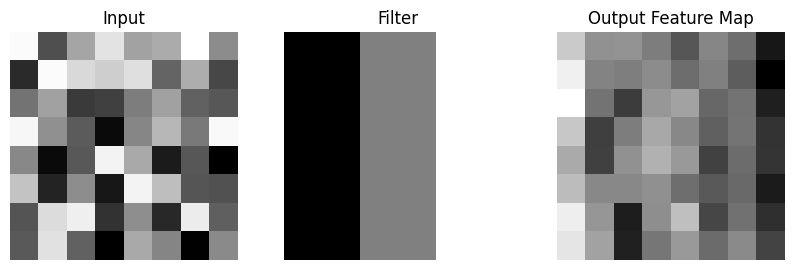

In [26]:
# 예시 입력: 간단한 흑백 이미지 (1채널)
x = np.random.rand(1, 1, 8, 8)

# 필터: 엣지 검출 커널 (Sobel과 유사)
W = np.array([[[[-1, 0, 1],
                [-1, 0, 1],
                [-1, 0, 1]]]])  # (FN=1, C=1, 3, 3)
b = np.array([0])

conv = Convolution_Layer(W, b, stride=1, pad=1)
out = conv.forward(x)

# --- 시각화 ---
plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.title("Input")
plt.imshow(x[0, 0], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Filter")
plt.imshow(W[0, 0], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Output Feature Map")
plt.imshow(out[0, 0], cmap='gray')
plt.axis('off')

plt.show()

위에서 코드를 잘 작성했다면 아래와 같은 실행결과가 나와야합니다.

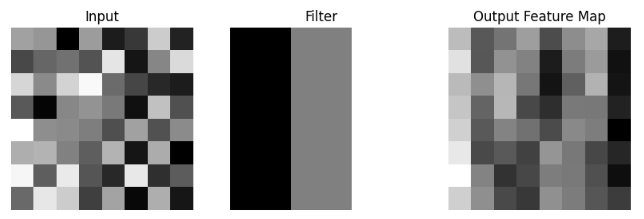

- 세로 검출용 filter를 사용하였습니다. (위 코드에서 커널을 보면 됨)
- 즉, 최종 출력된 Output feature map은 이미지의 세로 부분이 있는 부분을 강조하게 되는걸 확인할 수 있습니다.
- 이처럼 Convolution 연산은 이미지를 분석하는 데에 가장 기본이 되는 모델입니다.

### 추가 내용
- 적어야하는 부분: Quesiton 4개, 코드 작성 1개
- 해당 자료는 오로지 DDFS 프로젝트를 위한 가장 간단한 insight들만을 다루므로, 더 깊은 구현을 위해서는 추가적인 공부가 필요합니다!

# (Advanced) What about in the framework?

저희가 앞으로 볼 프레임워크에서는 아래와 같이 layer를 추가하는 방식으로만 구현해주면 충분합니다. 다른 layer들도 동일한 방식입니다.

`1. structures`에서 미리 보았던 CNN structure를 구현해보겠습니다

![인공신경망](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdna%2FdlNjdp%2FbtqCxReQHpe%2FAAAAAAAAAAAAAAAAAAAAAH25fahDOHwV4SQSAOwr0VGFt1Ba0Yxqv9yXGNhaqEzH%2Fimg.png%3Fcredential%3DyqXZFxpELC7KVnFOS48ylbz2pIh7yKj8%26expires%3D1764514799%26allow_ip%3D%26allow_referer%3D%26signature%3DQ%252Fd%252FD9liX8TN%252F2oJ6Ohdsb714Z0%253D)


## Keras

> 아래 코드들은 어떤 동작도 하지 않는 코드로, 단지 모델 구조만을 한눈에 보기 위해 사용되었습니다! 파라미터의 숫자는 랜덤한 수를 넣었습니다

In [27]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),  # 첫 번째 FC (Affine + ReLU)
    layers.Dense(64, activation='relu'),   # 두 번째 FC (Affine + ReLU)
    layers.Dense(10, activation='softmax') # 출력층
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,634,058 (6.23 MB)

 Trainable params: 1,634,058 (6.23 MB)

 Non-trainable params: 0 (0.00 B)

## Pytorch

> 아래 코드들은 어떤 동작도 하지 않는 코드로, 단지 모델 구조만을 한눈에 보기 위해 사용되었습니다! 파라미터의 숫자는 랜덤한 수를 넣었습니다

In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNNExample(nn.Module):
    def __init__(self):
        super(CNNExample, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3)   # RGB 입력
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.pool = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(64 * 13 * 13, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.softmax(x, dim=1)

model = CNNExample()
print(model)

CNNExample(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=10816, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)
